<a href="https://colab.research.google.com/github/manoj-nain/AIChamp/blob/master/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data Agumentation

In [ ]:


import numpy as np                                
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
import h5py
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils

In [ ]:
data = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = data.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
 
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(400, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)

In [ ]:
batch_size = 64

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

In [ ]:
X_valid, X_train = x_train[:5000], x_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [ ]:
from keras.callbacks import LearningRateScheduler

In [ ]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=X_train.shape[0] // batch_size,epochs=20,\
                    verbose=1,validation_data=(X_valid,y_valid)) 

Epoch 1/20
703/703 [==============================] - 35s 50ms/step - loss: 0.9224 - accuracy: 0.6706 - val_loss: 0.9806 - val_accuracy: 0.6546
Epoch 2/20
703/703 [==============================] - 35s 50ms/step - loss: 0.9072 - accuracy: 0.6753 - val_loss: 0.9908 - val_accuracy: 0.6544
Epoch 3/20
703/703 [==============================] - 35s 50ms/step - loss: 0.9035 - accuracy: 0.6751 - val_loss: 0.9932 - val_accuracy: 0.6560
Epoch 4/20
703/703 [==============================] - 35s 50ms/step - loss: 0.9076 - accuracy: 0.6746 - val_loss: 0.9938 - val_accuracy: 0.6554
Epoch 5/20
703/703 [==============================] - 35s 50ms/step - loss: 0.9051 - accuracy: 0.6766 - val_loss: 1.0038 - val_accuracy: 0.6554
Epoch 6/20
703/703 [==============================] - 35s 50ms/step - loss: 0.9075 - accuracy: 0.6740 - val_loss: 1.0013 - val_accuracy: 0.6538
Epoch 7/20
703/703 [==============================] - 35s 50ms/step - loss: 0.9003 - accuracy: 0.6791 - val_loss: 0.9940 - val_accuracy:

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.0437 - accuracy: 0.6415


[1.0436955690383911, 0.6414999961853027]

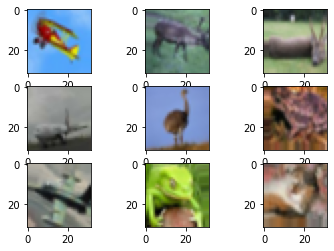

In [ ]:
# see example augmentation images
for X_batch, y_batch in datagen.flow(X_train_full, y_train_full, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
    plt.show()
    break